# Imports

In [29]:
import pandas as pd
import numpy as np

#for Normalization
from sklearn.preprocessing import StandardScaler

# for plotting
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# for training model Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# for logistic Regression
from sklearn.linear_model import LogisticRegression

# for classification report
from sklearn.metrics import classification_report

# for cross validation
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline

# Data

In [2]:
# we are using two different data, one in csv form and another in json

# csv data
fma_data = pd.read_csv('fma-rock-vs-hiphop.csv')

#json data
echo_data = pd.read_json('echonest-metrics.json')

In [19]:
# getting the overview of the data
fma_data.tail()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy
17733,155247,320000,0,Fleslit,2017-03-29 01:40:28,NaN,211,3,Hip-Hop,"[21, 539, 811]",...,NaN,1379,NaN,Attribution,1025,NaN,0,Fleslit,"['instrumental trap beat', 'love', 'instrument...",Love In The Sky


In [4]:
echo_data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


**We can see both data has track_id as a common columns so we can merge on the basis of this column**

In [5]:
# merging the two data frames
merged_data = echo_data.merge(fma_data[['genre_top','track_id']], on='track_id')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


# Relationship between the continuous variables

In [6]:
# we can create a correlation matrix between the continuous variables
corr_matrix = merged_data.corr()

#plotting the matrix
corr_matrix.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


**darker the shade or close to one value means the variables are highly correlated**

# Normalization

In [7]:
# for this we will be using standard Scaler 
#defining the scaler
scaler = StandardScaler()

# we dont need to scale the track_id and genre_top column
tobe_scaled = merged_data.drop(['track_id', 'genre_top'], axis =1)

# we also need to define labels, which will be the target variable
labels = merged_data['genre_top']

In [8]:
# using scaler on tobe_scaled
scaled_data = scaler.fit_transform(tobe_scaled)

# PCA and plotting

In [9]:
# getting variance ratios from PCA

#defining PCA
pca = PCA()

#fitting pca in scaled_data
pca.fit(scaled_data)

# getting variance ratios and storing in a variable
var_ratios = pca.explained_variance_ratio_

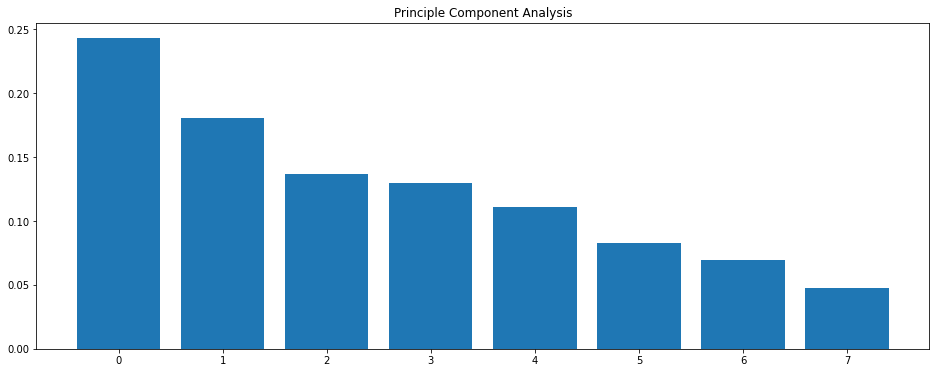

In [10]:
# now plotting the ratios obtained above
# canvas size
plt.figure(figsize=(16,6))

# title
plt.title('Principle Component Analysis')

# bar plot
plt.bar(range(pca.n_components_), var_ratios)

plt.show()


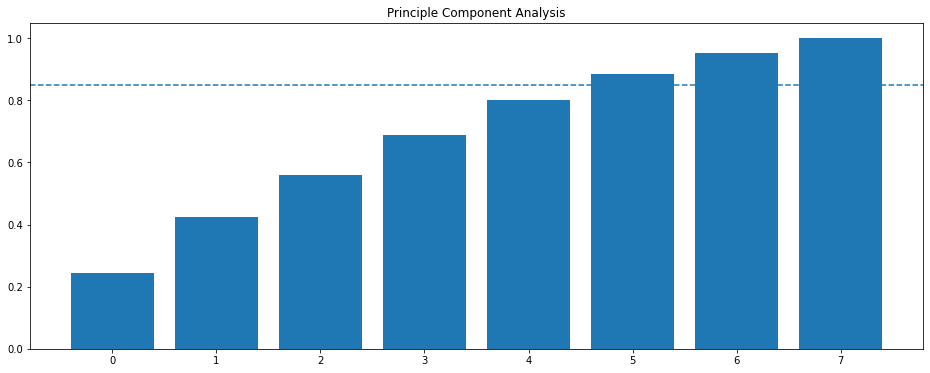

In [11]:
# diving more into PCA visualization
# getting cummulative explained variance from pca
cummulative_ratios = np.cumsum(var_ratios)

# plotting the data with a line at 0.85

# canvas size
plt.figure(figsize=(16,6))

# title
plt.title('Principle Component Analysis')

# bar plot
plt.bar(range(pca.n_components_), cummulative_ratios)

#line
plt.axhline(y=0.85, linestyle='--')

plt.show()


In [12]:
# since we can explain 85% of our data with n_components=6 so fitting PCA with this number
n_components =6 

# PCA with chosen n_components
pca = PCA(n_components, random_state=0)
pca.fit(scaled_data)
pca_projected  = pca.transform(scaled_data)

# Training the Model

In [13]:
# splitting features and target varibale into train and test data set
train_X, test_X, train_y, test_y = train_test_split(pca_projected, labels, random_state=0, test_size=0.2)

In [14]:
# training the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# fitting the model
decision_tree.fit(train_X,train_y)

# predicting the labels 
labels_predicted = decision_tree.predict(test_X)

# Comparison to Logistic Regression


In [16]:
# defining a logistic regression
log_model = LogisticRegression(random_state=0)

#fitting
log_model.fit(train_X, train_y)

#predicting
log_labels_pred = log_model.predict(test_X)

In [18]:
# Creating a classification report for both the models
class_report_tree =  classification_report(labels_predicted, test_y)
class_report_logi = classification_report(log_labels_pred, test_y)

# printing the result
print('Decision Tree: \n', class_report_tree)
print('Logistic Regression: \n', class_report_logi)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.58      0.59       191
        Rock       0.90      0.91      0.90       770

    accuracy                           0.84       961
   macro avg       0.75      0.74      0.74       961
weighted avg       0.84      0.84      0.84       961

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.48      0.72      0.58       123
        Rock       0.96      0.89      0.92       838

    accuracy                           0.86       961
   macro avg       0.72      0.80      0.75       961
weighted avg       0.89      0.86      0.88       961



# Balancing the data for the higher accuracy

In [20]:
# separating hiphop data from the whole set
hiphop_data = merged_data.loc[merged_data['genre_top']=='Hip-Hop']

# separating rock data from the whole set
rock_data = merged_data.loc[merged_data['genre_top']=='Rock']

In [21]:
# selecting Rock sample equal to size of hiphop data
rock_sample = rock_data.sample(hiphop_data.shape[0], random_state=0)

# merging both the data
balanced_merge = pd.concat([hiphop_data, rock_sample])

In [22]:
# creating features and labels for the balanced data
features_bal = balanced_merge.drop(['track_id', 'genre_top'], axis=1)
labels_bal = balanced_merge['genre_top']

In [23]:
# for pca projection
pca_projected_bal = pca.fit_transform(scaler.fit_transform(features_bal))

In [25]:
# train test
train_X2, test_X2, train_y2, test_y2 = train_test_split(pca_projected_bal, labels_bal, random_state=0, test_size=0.2)

# Checking if the Balanced data works or not

In [26]:
# training the decision tree
decision_tree = DecisionTreeClassifier(random_state=0)

# fitting the model
decision_tree.fit(train_X2,train_y2)

# predicting the labels 
labels_predicted_bal = decision_tree.predict(test_X2)

In [27]:
# defining a logistic regression
log_model = LogisticRegression(random_state=0)

#fitting
log_model.fit(train_X2, train_y2)

#predicting
log_labels_pred_bal = log_model.predict(test_X2)

In [28]:
# Creating a classification report for both the models
bal_class_report_tree =  classification_report(labels_predicted_bal, test_y2)
bal_class_report_logi = classification_report(log_labels_pred_bal, test_y2)

# printing the result
print('Decision Tree: \n', bal_class_report_tree)
print('Logistic Regression: \n', bal_class_report_logi)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.80      0.76      0.78       193
        Rock       0.74      0.79      0.76       171

    accuracy                           0.77       364
   macro avg       0.77      0.77      0.77       364
weighted avg       0.77      0.77      0.77       364

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.78      0.81       194
        Rock       0.77      0.82      0.80       170

    accuracy                           0.80       364
   macro avg       0.80      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364



# Cross Validation

In [30]:
# setting up for the Cross Validation

# defining KFold
kf = KFold(10)

# logistic Regression and Decision Tree
decision_tree = DecisionTreeClassifier(random_state=0)
log_model = LogisticRegression(random_state=0)

# finding cross validation score for both models
score_dec_tree = cross_val_score(decision_tree, pca_projected_bal, labels_bal, cv=kf)
score_log_model = cross_val_score(log_model, pca_projected_bal, labels_bal, cv=kf)

In [32]:
# Now printing the values
print(' Cross Validation Score for Decision Tree: ',np.mean(score_dec_tree))
print(' Cross Validation Score for Logistic Regression:', np.mean(score_log_model))

 Cross Validation Score for Decision Tree:  0.7340659340659341
 Cross Validation Score for Logistic Regression: 0.7807692307692308
